Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)


In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type


* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [105]:
#Raw data of city csv
filepath = os.path.join("raw_data/city_data.csv")
city_raw_df=pd.read_csv(filepath, low_memory="false")
city_raw_df.sort_values("city").tail(75)

,city,driver_count,type
22,New Andreamouth,42,Urban
73,New Brandonborough,9,Suburban
35,New Christine,22,Urban
83,New Cindyborough,20,Suburban
23,New David,31,Urban
30,New Jeffrey,58,Urban
107,New Jessicamouth,22,Suburban
111,New Johnbury,6,Rural
96,New Lynn,20,Suburban
33,New Maryport,26,Urban


In [106]:
#raw data of ride csv
filepath2 = os.path.join("raw_data/ride_data.csv")
ride_raw_df=pd.read_csv(filepath2, low_memory="false")
ride_raw_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [107]:
#x_axis = total number of rides per city
rides_per_city = ride_raw_df.groupby("city")[["date"]].count()
rides_per_city.head()

,date
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [108]:
#y_axis = average fare per city
fare_per_city = ride_raw_df.groupby("city")[["fare"]].mean()
fare_per_city.head()

,fare
city,
Alvarezhaven,23.928710
Alyssaberg,20.609615
Anitamouth,37.315556
Antoniomouth,23.625000
Aprilchester,21.981579


In [83]:
# size of bubble = total number of drivers per city
#size = city_raw_df[["city","driver_count"]]
#size

city_raw_df.groupby("city")[["driver_count"]].mean()

,driver_count
city,
Alvarezhaven,21
Alyssaberg,67
Anitamouth,16
Antoniomouth,21
Aprilchester,49
Arnoldview,41
Campbellport,26
Carrollbury,4
Carrollfort,55


In [84]:
#color of bubble = type of city
type_city = city_raw_df[["city","type"]].drop_duplicates()
type_city




,city,type
0,Kelseyland,Urban
1,Nguyenbury,Urban
2,East Douglas,Urban
3,West Dawnfurt,Urban
4,Rodriguezburgh,Urban
5,South Josephville,Urban
6,West Sydneyhaven,Urban
7,Travisville,Urban
8,Torresshire,Urban
9,Lisaville,Urban


In [93]:
#type_city["type"]
rides_per_city["date"]

city
Alvarezhaven            31
Alyssaberg              26
Anitamouth               9
Antoniomouth            22
Aprilchester            19
Arnoldview              31
Campbellport            15
Carrollbury             10
Carrollfort             29
Clarkstad               12
Conwaymouth             11
Davidtown               21
Davistown               25
East Cherylfurt         13
East Douglas            22
East Erin               28
East Jenniferchester    19
East Leslie             11
East Stephen            10
East Troybury            7
Edwardsbury             27
Erikport                 8
Eriktown                19
Floresberg              10
Fosterside              24
Hernandezshire           9
Horneland                4
Jacksonfort              6
Jacobfort               31
Jasonfort               12
                        ..
South Roy               22
South Shannonborough    15
Spencertown             26
Stevensport              5
Stewartview             30
Swansonbury            

In [85]:
#X axis intervals



In [86]:
#?plt.scatter

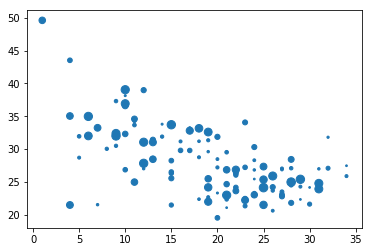

In [104]:
plt.scatter(rides_per_city["date"], fare_per_city["fare"], s=size["driver_count"])
plt.show()

In [ ]:
plt.scatter(rides_per_city, fare_per_city)
plt.show()

In [ ]:
#tick marks x axis
x_axis = np.arange(0,rides_per_city["date"].max() + 10,5)
x_axis

In [ ]:
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Pyber Ride Sharing Data (2016)"")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Print our chart to the screen
plt.show()